<a href="https://colab.research.google.com/github/jewel-pruthi/machine-learning/blob/main/Classification_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # to build a decision tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split dataset into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix


## **Importing data**

In [ ]:
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


The dataset is sourced from UCI Machine Learning Repository and I'm going to use the [Hearts Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) Cleveland Dataset. This dataset allows us to predict if someone has heart disease based on the measurement of features such as age, sex, blood pressure etc.

In [ ]:
df = pd.read_csv("processed.cleveland.data", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


As we can see instead of the column names, we have column numbers. So, I'll use the data descriptions file to rename them as below:

**Attribute Information:**
1. age : age in years
2. sex : (1 = male; 0 = female)
3. cp :  chest pain type
  *   Value 1: typical angina
  *   Value 2: atypical angina
  *   Value 3: non-anginal pain
  *   Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
  *   Value 0: normal
  *   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  *   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteriaList item

8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
  * Value 1: upsloping
  * Value 2: flat
  * Value 3: downsloping
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num : the predicted attribute; diagnosis of heart disease (angiographic disease status)
  * Value 0: < 50% diameter narrowing
  * Value 1: > 50% diameter narrowing

In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal', 'hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **Check for missing values**

In [ ]:
df.isnull().sum()

# df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

Great news, there is no missing data in the provided dataset. We can use any of the two commands in the cell above to check the presence of missing values and treat accordingly.

In [ ]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
len(df.loc[(df.ca == '?') | (df.thal == '?')])

6

In [ ]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
round(len(df.loc[(df.ca == '?') | (df.thal == '?')]) / len(df) * 100,2)

1.98

In [ ]:
df_no_missing = df.loc[(df.ca != '?') & (df.thal != '?')]
df_no_missing.shape

(297, 14)

In [ ]:
df_no_missing.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## **Splitting the dataset into dependent and independent variables**

In [ ]:
X = df_no_missing.drop('hd', axis = 1).copy()
print(X.head())
print(X.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0  
3    3.0  0.0  3.0  
4    1.0  0.0  3.0  
(297, 13)


In [ ]:
y = df_no_missing['hd'].copy()
print(y.head())
print(y.shape)


0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64
(297,)


## **One Hot Encoding**

In [ ]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [ ]:
#testing get_dummies() on a single column before encoding other category columns 
pd.get_dummies(X, columns = ['cp'].head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'thal', 'slope'])
X_encoded.shape

(297, 22)

In [ ]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,1,0,0,0,1
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,1,0,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,0,1,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,1,0,0,0,0,1
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_non_zero_index = y > 0
y[y_non_zero_index] = 1
y.unique()

array([0, 1])

## **Build a preliminary classification tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

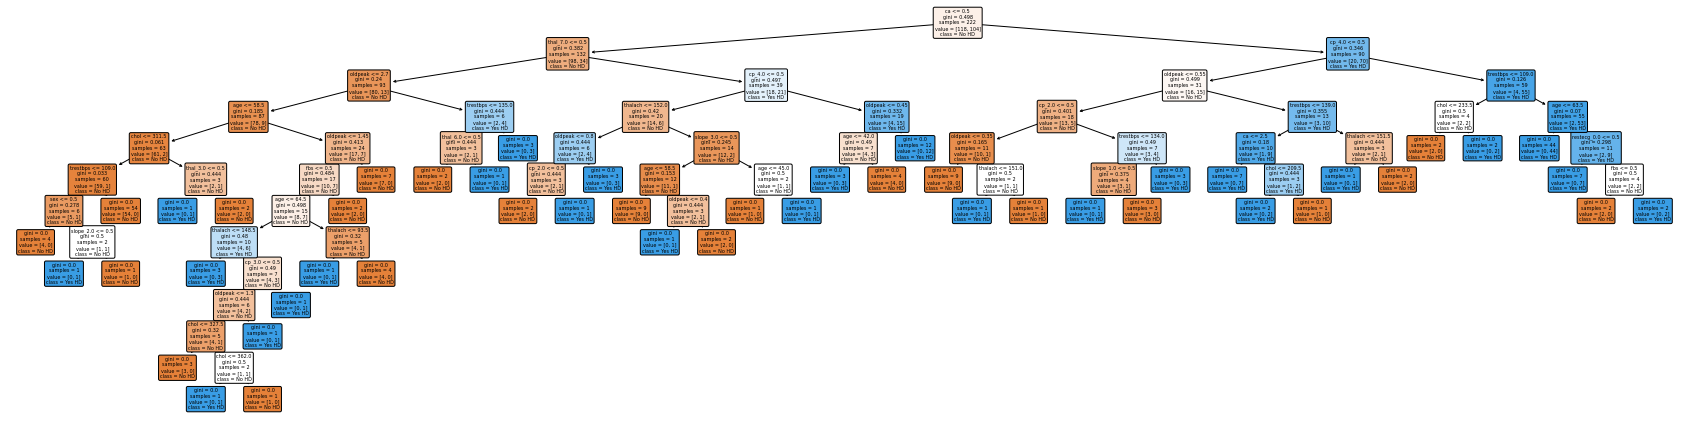

In [ ]:
plt.figure(figsize = (30,7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = X_encoded.columns);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


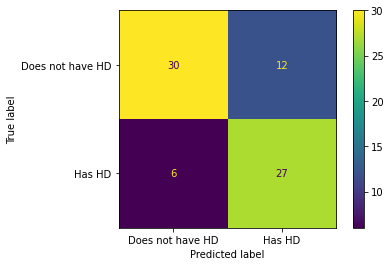

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['Does not have HD', 'Has HD'])

In this confusion matrix, we can see that out of the **42** people who do not have a heart disease, **30 (71%)** were correctly classified and of the **33** people who have a heart disease, **27(81%)** people were correctly classified. It seems like this classification tree may have overfit the training dataset. So, let's try pruning it and re-evaluate the performance.

## **Cost Complexity Pruning** 

Pruning a decision tree is all about finding the right value of pruning parameter, `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. Let's try this for both training and testing dataset.

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #to determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values of alpha
print(ccp_alphas.max())
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value of alpha
print(ccp_alphas.max())

clf_dts = [] # create an array for putting decision trees into

## next, we create a decision tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

0.13046215748918455
0.039345232893619964


Let's now graph the accuracy of the trees using the training and testing datasets as a function of alpha

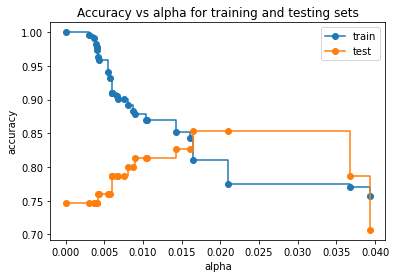

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

We can see from the graph above that the **testing dataset** hits its maximum value when `alpha` is about 0.016. After this value for alpha, the accuracy of the training dataset drops off and suggests we should set `ccp_alpha` **= 0.016**

It's also interesting to note that when we apply Cost Complexity Pruning to a ***Classification tree***, values for **alpha go from 0 to 1**, because Gini scores go from 0 to 1 (we use probability to calc. gini scores of a node). In contrast, values for alpha for a ***Regression tree*** can be much larger since the sum of squared residuals can in theory go from **0 to positive infinity**. 

Additionally, there are many ways to split a dataset into train and test. We don't know which is the best split, so it's ideal to use **10 fold Cross Validation** to find that out!

## **Cost Complexity Pruning Part 2 : Using Cross Validation for finding the optimal alpha**

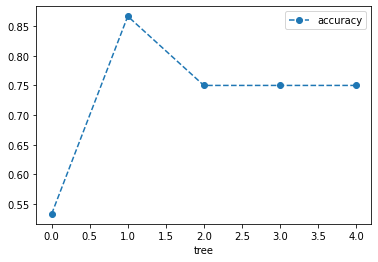

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy':scores})
df.plot(x='tree', y= 'accuracy', marker = 'o', linestyle = '--')

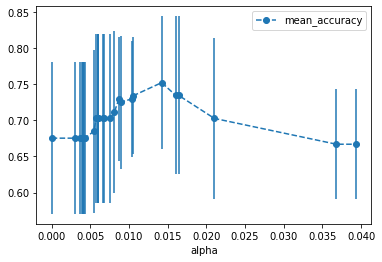

In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha', y= 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
21,0.014225,0.752323,0.091956


In [ ]:
ideal_ccp_alpha = float(alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha'])
ideal_ccp_alpha

0.014224751066856332

**Building the final pruning tree**

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


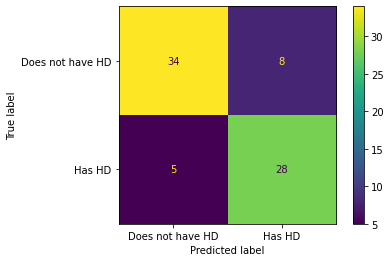

In [ ]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ['Does not have HD', 'Has HD'] )

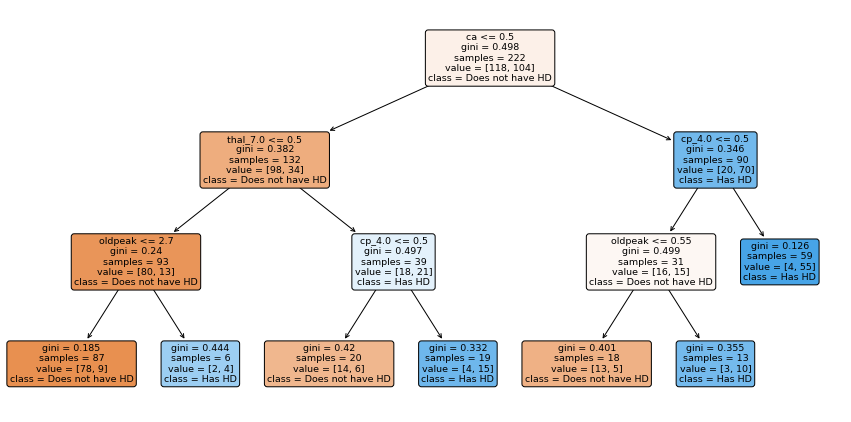

In [ ]:
plt.figure(figsize = (15,7.5))
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ['Does not have HD', 'Has HD'], feature_names = X_encoded.columns);